In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Creación de objetos
Creando una serie al pasar una lista de valores, permitiendo a pandas crear un índice entero predeterminado:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creando un DataFrame pasando una matriz NumPy, con un índice de fecha y hora y columnas etiquetadas:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.552691,-1.512822,1.118231,1.197556
2013-01-02,1.307783,-1.896737,-1.060383,-2.438847
2013-01-03,1.596801,-0.889451,1.149515,-1.469473
2013-01-04,-1.912812,-0.371364,2.445951,-2.033028
2013-01-05,-0.236227,-0.742780,0.108423,-0.836447
2013-01-06,-1.285246,-1.046436,-0.966258,-0.006245


Creando un DataFrame pasando un dictado de objetos que pueden convertirse a series.

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : pd.Categorical(["test","train","test","train"]),
                         'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Las columnas del DataFrame resultante tienen diferentes tipos de dtypes.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Visualización de datos
Aquí es cómo ver las filas superior e inferior del marco:

In [8]:
df.head()

,A,B,C,D
2013-01-01,-0.552691,-1.512822,1.118231,1.197556
2013-01-02,1.307783,-1.896737,-1.060383,-2.438847
2013-01-03,1.596801,-0.889451,1.149515,-1.469473
2013-01-04,-1.912812,-0.371364,2.445951,-2.033028
2013-01-05,-0.236227,-0.742780,0.108423,-0.836447


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.912812,-0.371364,2.445951,-2.033028
2013-01-05,-0.236227,-0.742780,0.108423,-0.836447
2013-01-06,-1.285246,-1.046436,-0.966258,-0.006245


Muestre el índice, las columnas y los datos subyacentes de NumPy:

In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.values

array([[-0.55269067, -1.51282206,  1.11823118,  1.19755631],
       [ 1.30778279, -1.89673736, -1.06038283, -2.43884686],
       [ 1.59680058, -0.88945063,  1.14951491, -1.46947303],
       [-1.91281231, -0.37136409,  2.44595091, -2.03302786],
       [-0.23622703, -0.74278003,  0.10842312, -0.83644744],
       [-1.28524627, -1.04643607, -0.96625829, -0.00624518]])

__describe()__ muestra un resumen estadístico rápido de sus datos:

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.180399,-1.076598,0.465913,-0.931081
std,1.395477,0.549116,1.365421,1.354466
min,-1.912812,-1.896737,-1.060383,-2.438847
25%,-1.102107,-1.396226,-0.697588,-1.892139
50%,-0.394459,-0.967943,0.613327,-1.152960
75%,0.921780,-0.779448,1.141694,-0.213796
max,1.596801,-0.371364,2.445951,1.197556


Transponiendo sus datos:

In [14]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.552691,1.307783,1.596801,-1.912812,-0.236227,-1.285246
B,-1.512822,-1.896737,-0.889451,-0.371364,-0.742780,-1.046436
C,1.118231,-1.060383,1.149515,2.445951,0.108423,-0.966258
D,1.197556,-2.438847,-1.469473,-2.033028,-0.836447,-0.006245


Clasificación por eje:

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.197556,1.118231,-1.512822,-0.552691
2013-01-02,-2.438847,-1.060383,-1.896737,1.307783
2013-01-03,-1.469473,1.149515,-0.889451,1.596801
2013-01-04,-2.033028,2.445951,-0.371364,-1.912812
2013-01-05,-0.836447,0.108423,-0.742780,-0.236227
2013-01-06,-0.006245,-0.966258,-1.046436,-1.285246


Clasificación por valores:

In [16]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,1.307783,-1.896737,-1.060383,-2.438847
2013-01-01,-0.552691,-1.512822,1.118231,1.197556
2013-01-06,-1.285246,-1.046436,-0.966258,-0.006245
2013-01-03,1.596801,-0.889451,1.149515,-1.469473
2013-01-05,-0.236227,-0.742780,0.108423,-0.836447
2013-01-04,-1.912812,-0.371364,2.445951,-2.033028


### Selección

__Nota__ Si bien las expresiones estándar de Python / Numpy para la selección y configuración son intuitivas y útiles para el trabajo interactivo, para el código de producción, recomendamos los métodos de acceso a datos pandas optimizados, .at, .iat, .loc y .iloc.

#### Obteniendo
Seleccionando una sola columna, que produce una Serie, equivalente a df.A:

In [17]:
df['A']

2013-01-01   -0.552691
2013-01-02    1.307783
2013-01-03    1.596801
2013-01-04   -1.912812
2013-01-05   -0.236227
2013-01-06   -1.285246
Freq: D, Name: A, dtype: float64

Seleccionando a través de [], que corta las filas.

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,-0.552691,-1.512822,1.118231,1.197556
2013-01-02,1.307783,-1.896737,-1.060383,-2.438847
2013-01-03,1.596801,-0.889451,1.149515,-1.469473


In [19]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.307783,-1.896737,-1.060383,-2.438847
2013-01-03,1.596801,-0.889451,1.149515,-1.469473
2013-01-04,-1.912812,-0.371364,2.445951,-2.033028


#### Selección por etiqueta
Para obtener una sección transversal utilizando una etiqueta:

In [20]:
df.loc[dates[0]]

A   -0.552691
B   -1.512822
C    1.118231
D    1.197556
Name: 2013-01-01 00:00:00, dtype: float64

Seleccionando en un multi-eje por etiqueta:

In [21]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.552691,-1.512822
2013-01-02,1.307783,-1.896737
2013-01-03,1.596801,-0.889451
2013-01-04,-1.912812,-0.371364
2013-01-05,-0.236227,-0.742780
2013-01-06,-1.285246,-1.046436


Mostrando el corte de etiquetas, se incluyen ambos puntos finales:

In [22]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.307783,-1.896737
2013-01-03,1.596801,-0.889451
2013-01-04,-1.912812,-0.371364


Reducción en las dimensiones del objeto devuelto:

In [23]:
df.loc['20130102',['A','B']]

A    1.307783
B   -1.896737
Name: 2013-01-02 00:00:00, dtype: float64

Para obtener un valor escalar:

In [24]:
df.loc[dates[0],'A']

-0.5526906697325444

Para obtener acceso rápido a un escalar (equivalente al método anterior):

In [26]:
df.at[dates[0],'A']

-0.5526906697325444

#### Selección por posición
Seleccione a través de la posición de los enteros pasados:

In [27]:
df.iloc[3]

A   -1.912812
B   -0.371364
C    2.445951
D   -2.033028
Name: 2013-01-04 00:00:00, dtype: float64

Por segmentos enteros, que actúan de forma similar a numpy / python:

In [28]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.307783,-1.060383
2013-01-03,1.596801,1.149515
2013-01-05,-0.236227,0.108423


Para cortar filas explícitamente:

In [29]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.512822,1.118231
2013-01-02,-1.896737,-1.060383
2013-01-03,-0.889451,1.149515
2013-01-04,-0.371364,2.445951
2013-01-05,-0.742780,0.108423
2013-01-06,-1.046436,-0.966258


Para obtener un valor explícitamente:

In [30]:
df.iloc[1,1]

-1.8967373606013216

Para obtener acceso rápido a un escalar (equivalente al método anterior):

In [31]:
df.iat[1,1]

-1.8967373606013216

#### Indexación booleana
Usando los valores de una sola columna para seleccionar datos.

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-02,1.307783,-1.896737,-1.060383,-2.438847
2013-01-03,1.596801,-0.889451,1.149515,-1.469473


Selección de valores de un DataFrame donde se cumple una condición booleana.

In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,1.118231,1.197556
2013-01-02,1.307783,NaN,NaN,NaN
2013-01-03,1.596801,NaN,1.149515,NaN
2013-01-04,NaN,NaN,2.445951,NaN
2013-01-05,NaN,NaN,0.108423,NaN
2013-01-06,NaN,NaN,NaN,NaN


Usando el método isin () para filtrar:

In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.552691,-1.512822,1.118231,1.197556,one
2013-01-02,1.307783,-1.896737,-1.060383,-2.438847,one
2013-01-03,1.596801,-0.889451,1.149515,-1.469473,two
2013-01-04,-1.912812,-0.371364,2.445951,-2.033028,three
2013-01-05,-0.236227,-0.742780,0.108423,-0.836447,four
2013-01-06,-1.285246,-1.046436,-0.966258,-0.006245,three


In [35]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,1.596801,-0.889451,1.149515,-1.469473,two
2013-01-05,-0.236227,-0.742780,0.108423,-0.836447,four


#### Settings
La configuración de una nueva columna alinea automáticamente los datos por los índices.

In [36]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

Configuración de valores por etiqueta:

In [37]:
df.at[dates[0],'A'] = 0

Setting values by position:

In [38]:
df.iat[0,1] = 0

Configuración mediante la asignación con una matriz NumPy:

In [39]:
df.loc[:,'D'] = np.array([5] * len(df))

El resultado de las operaciones de configuración anteriores.

In [40]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,1.118231,5
2013-01-02,1.307783,-1.896737,-1.060383,5
2013-01-03,1.596801,-0.889451,1.149515,5
2013-01-04,-1.912812,-0.371364,2.445951,5
2013-01-05,-0.236227,-0.742780,0.108423,5
2013-01-06,-1.285246,-1.046436,-0.966258,5


Una operación __where__ con la configuración.

In [41]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.118231,-5
2013-01-02,-1.307783,-1.896737,-1.060383,-5
2013-01-03,-1.596801,-0.889451,-1.149515,-5
2013-01-04,-1.912812,-0.371364,-2.445951,-5
2013-01-05,-0.236227,-0.742780,-0.108423,-5
2013-01-06,-1.285246,-1.046436,-0.966258,-5


### Datos perdidos
pandas utiliza principalmente el valor np.nan para representar los datos que faltan. Es por defecto no incluido en los cálculos. 
La reindexación le permite cambiar / agregar / eliminar el índice en un eje específico. Esto devuelve una copia de los datos.

In [42]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.118231,5,1.0
2013-01-02,1.307783,-1.896737,-1.060383,5,1.0
2013-01-03,1.596801,-0.889451,1.149515,5,NaN
2013-01-04,-1.912812,-0.371364,2.445951,5,NaN


Para eliminar cualquier fila que tenga datos faltantes.

In [43]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.118231,5,1.0
2013-01-02,1.307783,-1.896737,-1.060383,5,1.0


Relleno de datos faltantes.

In [44]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.118231,5,1.0
2013-01-02,1.307783,-1.896737,-1.060383,5,1.0
2013-01-03,1.596801,-0.889451,1.149515,5,5.0
2013-01-04,-1.912812,-0.371364,2.445951,5,5.0


Para obtener la máscara booleana donde los valores son nan.

In [45]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### Operaciones
#### Estadísticas
Las operaciones en general excluyen los datos faltantes. 

Realizando una estadística descriptiva:

In [46]:
df.mean()

A   -0.088284
B   -0.824461
C    0.465913
D    5.000000
dtype: float64

Misma operación en el otro eje:

In [47]:
df.mean(1)

2013-01-01    1.529558
2013-01-02    0.837666
2013-01-03    1.714216
2013-01-04    1.290444
2013-01-05    1.032354
2013-01-06    0.425515
Freq: D, dtype: float64

Operando con objetos que tienen diferente dimensionalidad y necesitan alineación. Además, los pandas transmiten automáticamente a lo largo de la dimensión especificada.

In [48]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [49]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,0.596801,-1.889451,0.149515,4.0
2013-01-04,-4.912812,-3.371364,-0.554049,2.0
2013-01-05,-5.236227,-5.742780,-4.891577,0.0
2013-01-06,NaN,NaN,NaN,NaN


#### APPLY
Aplicando funciones a los datos:

In [50]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,1.118231,5
2013-01-02,1.307783,-1.896737,0.057848,10
2013-01-03,2.904583,-2.786188,1.207363,15
2013-01-04,0.991771,-3.157552,3.653314,20
2013-01-05,0.755544,-3.900332,3.761737,25
2013-01-06,-0.529702,-4.946768,2.795479,30


In [51]:
df.apply(lambda x: x.max() - x.min())

A    3.509613
B    1.896737
C    3.506334
D    0.000000
dtype: float64

#### Histogramas

In [53]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    1
2    3
3    0
4    4
5    1
6    1
7    6
8    0
9    4
dtype: int32

In [54]:
s.value_counts()

1    3
4    2
0    2
6    1
5    1
3    1
dtype: int64

#### Método String
La serie está equipada con un conjunto de métodos de procesamiento de cadenas en el atributo str que facilitan la operación en cada elemento de la matriz, como se muestra en el fragmento de código a continuación. Tenga en cuenta que la coincidencia de patrones en str generalmente usa expresiones regulares por defecto (y en algunos casos siempre las usa). Ver más en métodos de cadena vectorizados.

In [57]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [58]:
s.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

### Merge
#### Concatenar
pandas ofrece varias facilidades para combinar fácilmente los objetos Series, DataFrame y Panel con varios tipos de lógica de conjunto para los índices y la funcionalidad de álgebra relacional en el caso de operaciones de combinación / combinación.

Concatenando objetos pandas junto con concat ():

In [59]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.648194,1.438761,-0.822393,-1.512626
1,-0.647513,1.016878,-0.320224,-0.006443
2,-0.403515,-0.718778,-0.392547,-0.551790
3,-0.531711,-0.998181,-0.428539,-0.327622
4,-0.329640,0.237516,0.671439,-0.246093
5,-1.958923,1.283891,-0.224819,-0.478429
6,-0.066863,-0.896573,0.359448,0.985665
7,-0.034017,1.663885,0.148803,-0.076470
8,-0.560462,0.644185,0.336311,-0.074855
9,1.880270,-1.266640,-0.290127,0.888278


In [62]:
# romperlo en pedazos
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.648194,1.438761,-0.822393,-1.512626
1,-0.647513,1.016878,-0.320224,-0.006443
2,-0.403515,-0.718778,-0.392547,-0.551790
3,-0.531711,-0.998181,-0.428539,-0.327622
4,-0.329640,0.237516,0.671439,-0.246093
5,-1.958923,1.283891,-0.224819,-0.478429
6,-0.066863,-0.896573,0.359448,0.985665
7,-0.034017,1.663885,0.148803,-0.076470
8,-0.560462,0.644185,0.336311,-0.074855
9,1.880270,-1.266640,-0.290127,0.888278


#### Unir (join)

In [65]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [66]:
left

,key,lval
0,foo,1
1,foo,2


In [67]:
right

,key,rval
0,foo,4
1,foo,5


In [68]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Otro ejemplo que se puede dar es:

In [69]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [70]:
left

,key,lval
0,foo,1
1,bar,2


In [72]:
right

,key,rval
0,foo,4
1,bar,5


In [73]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


#### Append

Añadir filas a DataFrame

In [75]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.011817,-0.478786,-1.209725,1.317872
1,0.511447,-0.780880,1.585477,1.679379
2,0.856818,-0.329402,-0.365385,-1.587415
3,0.173477,-0.836182,0.727329,0.351832
4,0.234707,-0.559733,0.002425,0.524813
5,3.050264,-1.469640,-0.107476,1.009002
6,1.464016,-0.769994,1.466734,0.941177
7,0.298459,-0.918211,2.730382,0.758669


In [76]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.011817,-0.478786,-1.209725,1.317872
1,0.511447,-0.780880,1.585477,1.679379
2,0.856818,-0.329402,-0.365385,-1.587415
3,0.173477,-0.836182,0.727329,0.351832
4,0.234707,-0.559733,0.002425,0.524813
5,3.050264,-1.469640,-0.107476,1.009002
6,1.464016,-0.769994,1.466734,0.941177
7,0.298459,-0.918211,2.730382,0.758669
8,0.173477,-0.836182,0.727329,0.351832


### Agrupar
Por "agrupar por" nos referimos a un proceso que involucra uno o más de los siguientes pasos:

* Dividir los datos en grupos según algunos criterios. 
* Aplicando una función a cada grupo de forma independiente. 
* Combinando los resultados en una estructura de datos.

In [78]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                              'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                              'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-2.603931,0.607483
1,bar,one,1.035002,0.404512
2,foo,two,0.122610,-0.249720
3,bar,three,-3.102663,-0.390090
4,foo,two,-0.930845,0.564579
5,bar,two,1.329170,0.724774
6,foo,one,-0.420361,0.316354
7,foo,three,1.935354,1.190763


Agrupando y luego aplicando la función sum () a los grupos resultantes.

In [79]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.738491,0.739196
foo,-1.897173,2.429459


Agrupar por múltiples columnas forma un índice jerárquico, y nuevamente podemos aplicar la función de suma.

In [80]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.035002  0.404512
    three -3.102663 -0.390090
    two    1.329170  0.724774
foo one   -3.024292  0.923838
    three  1.935354  1.190763
    two   -0.808235  0.314859

### Reorganizar

#### Apilar


In [82]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df2 = df[:4]

df2

A         B
first second                    
bar   one    -1.263686  0.211593
      two     1.162929  0.108442
baz   one     0.406656  1.145738
      two     1.144543  1.492541

El método stack () "comprime" un nivel en las columnas del DataFrame.

In [83]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.263686
               B    0.211593
       two     A    1.162929
               B    0.108442
baz    one     A    0.406656
               B    1.145738
       two     A    1.144543
               B    1.492541
dtype: float64

Con un DataFrame o Serie "apilado" (que tiene un MultiIndex como índice), la operación inversa de stack () es unstack (), que de manera predeterminada desapila el último nivel:

In [84]:
stacked.unstack()

A         B
first second                    
bar   one    -1.263686  0.211593
      two     1.162929  0.108442
baz   one     0.406656  1.145738
      two     1.144543  1.492541

In [85]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.263686  1.162929
      B  0.211593  0.108442
baz   A  0.406656  1.144543
      B  1.145738  1.492541

In [86]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.263686  0.406656
       B  0.211593  1.145738
two    A  1.162929  1.144543
       B  0.108442  1.492541

### Tablas Dinámicas

In [88]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                       'B' : ['A', 'B', 'C'] * 4,
                       'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D' : np.random.randn(12),
                       'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.013797,0.467937
1,one,B,foo,0.581430,0.160517
2,two,C,foo,0.096598,-0.648753
3,three,A,bar,1.149995,-0.907890
4,one,B,bar,1.052317,1.496244
5,one,C,bar,0.498474,0.350594
6,two,A,foo,0.662083,-0.330047
7,three,B,foo,0.377876,1.180305
8,one,C,foo,1.571341,-0.270450
9,one,A,bar,-0.350172,0.975281


Podemos producir tablas dinámicas a partir de estos datos muy fácilmente:

In [89]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.350172  0.013797
      B  1.052317  0.581430
      C  0.498474  1.571341
three A  1.149995       NaN
      B       NaN  0.377876
      C -0.639846       NaN
two   A       NaN  0.662083
      B -0.185990       NaN
      C       NaN  0.096598

### Series de Tiempo
pandas tiene una funcionalidad simple, potente y eficiente para realizar operaciones de remuestreo durante la conversión de frecuencia (por ejemplo, convertir los datos en segundo lugar en datos de 5 minutos). Esto es extremadamente común en, pero no limitado a, aplicaciones financieras.

In [90]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    24694
Freq: 5T, dtype: int32

Representación de zona horaria:

In [91]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.217370
2012-03-07   -0.225618
2012-03-08   -0.098873
2012-03-09    0.436646
2012-03-10   -1.038152
Freq: D, dtype: float64

In [92]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.217370
2012-03-07 00:00:00+00:00   -0.225618
2012-03-08 00:00:00+00:00   -0.098873
2012-03-09 00:00:00+00:00    0.436646
2012-03-10 00:00:00+00:00   -1.038152
Freq: D, dtype: float64

Convertir a otra zona horaria:

In [93]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.217370
2012-03-06 19:00:00-05:00   -0.225618
2012-03-07 19:00:00-05:00   -0.098873
2012-03-08 19:00:00-05:00    0.436646
2012-03-09 19:00:00-05:00   -1.038152
Freq: D, dtype: float64

Convertir entre representaciones de intervalo de tiempo:

In [94]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.329977
2012-02-29   -2.320449
2012-03-31   -0.853059
2012-04-30   -1.180552
2012-05-31    1.950819
Freq: M, dtype: float64

In [95]:
ps = ts.to_period()
ps

2012-01   -0.329977
2012-02   -2.320449
2012-03   -0.853059
2012-04   -1.180552
2012-05    1.950819
Freq: M, dtype: float64

In [96]:
ps.to_timestamp()

2012-01-01   -0.329977
2012-02-01   -2.320449
2012-03-01   -0.853059
2012-04-01   -1.180552
2012-05-01    1.950819
Freq: MS, dtype: float64

La conversión entre período y marca de tiempo permite el uso de algunas funciones aritméticas convenientes. En el siguiente ejemplo, convertimos una frecuencia trimestral con el año que termina en noviembre a las 9 am del final del mes siguiente al final del trimestre:

In [97]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.084206
1990-06-01 09:00   -0.644956
1990-09-01 09:00    0.530449
1990-12-01 09:00    0.088802
1991-03-01 09:00    0.469600
Freq: H, dtype: float64

### Categóricos
Los pandas pueden incluir datos categóricos en un DataFrame.

In [98]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convertir las calificaciones en bruto a un tipo de datos categóricos.

In [99]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Cambie el nombre de las categorías a nombres más significativos (¡la asignación a Series.cat.categories es in situ!).

In [100]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reordene las categorías y agregue simultáneamente las categorías faltantes (los métodos en Series .cat devuelven una nueva Serie de manera predeterminada).

In [101]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

La clasificación es por orden en las categorías, no por orden léxico.

In [102]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Agrupar por una columna categórica también muestra categorías vacías.

In [103]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Gráficos

Los métodos de trazado permiten un puñado de estilos de trazado distintos del trazado de líneas predeterminado. 
Estos métodos se pueden proporcionar como el argumento de palabra clave de tipo para plot () e incluyen: 

* 'bar' o 'barh' para gráficos de barras 
* 'hist' para histograma 
* 'box' para boxplot 
* 'kde o 'desnsity' para gráficos de densidad 
* 'area' para gráficos de área 
* 'scatter' para diagramas de dispersión 
* 'hexbin' para gráficos hexagonales 
* 'pie' para gráficos de pastel

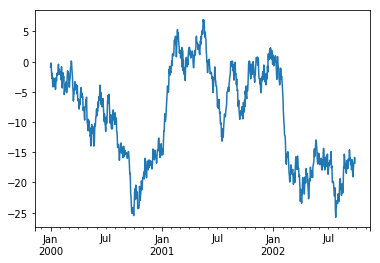

In [104]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

En un DataFrame, el método plot () es una conveniencia para trazar todas las columnas con etiquetas:

<Figure size 432x288 with 0 Axes>

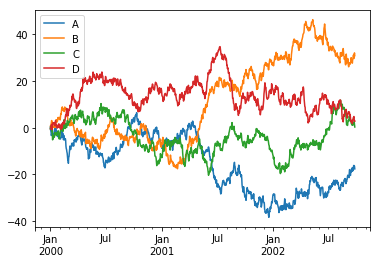

In [105]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                      columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

### Archivos

#### CSV

Escritura:

In [106]:
df.to_csv('foo.csv')

Lectura:

In [107]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.156932,0.675723,-0.538248,-0.457516
1,2000-01-02,-1.359323,0.926647,0.625325,0.054675
2,2000-01-03,-1.759719,1.252085,0.487191,0.160621
3,2000-01-04,-3.376521,2.004341,0.117473,1.162223
4,2000-01-05,-2.811445,3.036070,0.354041,1.131231
5,2000-01-06,-2.673452,2.024965,-1.592214,-0.871384
6,2000-01-07,-0.719704,2.176098,-1.535339,0.027349
7,2000-01-08,-1.697302,1.123737,-5.211974,1.948946
8,2000-01-09,-2.717098,0.630564,-5.023342,2.015026
9,2000-01-10,-2.706608,0.242180,-4.146521,1.760626


#### HDF5

Escritura:

In [110]:
#df.to_hdf('foo.h5','df')
#pd.read_hdf('foo.h5','df')

In [111]:
#df.to_excel('foo.xlsx', sheet_name='Sheet1')
#pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])